In [1]:
 #IMPORT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns

In [2]:
#SET OPTIONS FOR PANDAS
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 3000) # Set a wider display width

In [3]:
#READ CSV
df_vg = pd.read_csv('vgsales.csv')

In [4]:
print(df_vg.head()) # в данном случае выводим только верхние 5 строк, так как все выводить нам не обязательно. Главное, работает.

   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


In [5]:
def dash():
    print('-' * 170)

def millions_formatter(x, pos):
    return f'{x / 1000000:.0f} M '

single_color_green = ['green']

In [6]:
#YEAR, PUBLISHER COLUMN MISSING VALUES, CLEAN BY FILLING NaN WITH 0
print(df_vg['Year'].isnull().sum())
print(df_vg['Publisher'].isnull().sum())

print(df_vg.duplicated().sum())
df_vg['Year'] = df_vg['Year'].fillna(0)
df_vg['Publisher'] = df_vg['Publisher'].fillna(0)

df_vg = df_vg.drop_duplicates()
#PRINT #2
print('df_vg_year_fillna_astype_int')
print(df_vg.head())

271
58
0
df_vg_year_fillna_astype_int
   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


In [7]:
df_vg['NA_Sales'] = (df_vg['NA_Sales'] * 1000000).astype(int)
df_vg['EU_Sales'] = (df_vg['EU_Sales'] * 1000000).astype(int)
df_vg['JP_Sales'] = (df_vg['JP_Sales'] * 1000000).astype(int)
df_vg['Other_Sales'] = (df_vg['Other_Sales'] * 1000000).astype(int)
df_vg['Global_Sales'] = (df_vg['Global_Sales'] * 1000000).astype(int)
df_vg['Year'] = (df_vg['Year']).astype(int)

print(df_vg.head())

   Rank                      Name Platform  Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006        Sports  Nintendo  41490000  29020000   3770000      8460000      82740000
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo  29080000   3580000   6810000       770000      40240000
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo  15850000  12880000   3790000      3310000      35820000
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo  15750000  11010000   3280000      2960000      33000000
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo  11270000   8890000  10220000      1000000      31370000


In [8]:
df_genre_year = df_vg.groupby(['Genre','Year']).agg(
    Global_Sales_sum = ('Global_Sales', 'sum'),
    NA_Sales_sum = ('NA_Sales', 'sum'),
    EU_Sales_sum = ('EU_Sales', 'sum'),
    JP_Sales_sum = ('JP_Sales', 'sum'),
    Other_Sales_sum = ('Other_Sales', 'sum'),
).reset_index()

print(df_genre_year)

df_genre_year = df_genre_year[df_genre_year['Year'] != 0]
df_genre_year_filtered = df_genre_year[df_genre_year['Global_Sales_sum'] > 5000000]

            Genre  Year  Global_Sales_sum  NA_Sales_sum  EU_Sales_sum  JP_Sales_sum  Other_Sales_sum
0          Action     0          28300000      16030000       8520000       1290000          2460000
1          Action  1980            340000        320000         20000             0                0
2          Action  1981          14840000      13860000        810000             0           120000
3          Action  1982           6520000       6070000        380000             0            50000
4          Action  1983           2860000       2670000        170000             0            20000
5          Action  1984           1850000        800000        190000        830000            30000
6          Action  1985           3520000       1640000        380000       1440000            60000
7          Action  1986          13740000       6520000       1660000       5310000           250000
8          Action  1987           1120000       1040000         60000             0        

Text(0.5, 1.0, 'Продажи видеоигр 1980-2017 г. \n \n Основной пик продаж игр пришелся на 2000-2014 год, \n далее рынок платных видеоигр пошел на спад. \n')

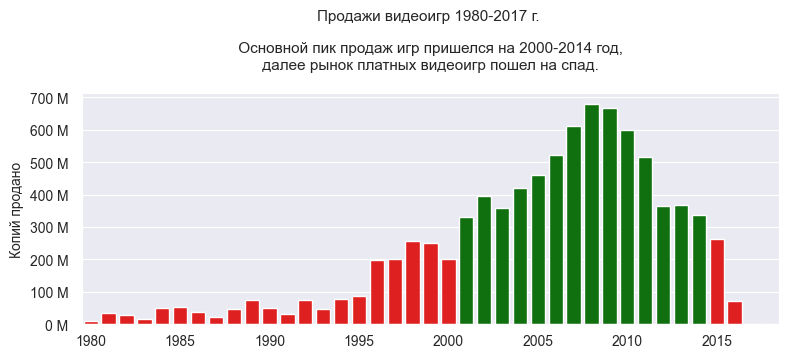

In [9]:
df_vg_year = (df_vg.groupby('Year', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False))

df_vg_year = df_vg_year[df_vg_year['Year'] != 0]

df_vg_year['sales_threshold'] = np.where(df_vg_year['Global_Sales'] > 300000000, 'Above_Threshold', 'Below_Threshold')
df_vg_year_palette = {'Above_Threshold' : 'green',
                      'Below_Threshold' : 'red'}

fig1, ax1 = plt.subplots(figsize=(9,3))
sns.barplot(df_vg_year, x="Year", y="Global_Sales", hue = "sales_threshold", palette = df_vg_year_palette, legend = False)
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax1.set_xticks(np.arange(0, 37,5))
plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

ax1.set(xlabel = None)
ax1.set(ylabel = 'Копий продано')

plt.title('Продажи видеоигр 1980-2017 г. \n \n Основной пик продаж игр пришелся на 2000-2014 год, \n далее рынок платных видеоигр пошел на спад. \n', fontsize=11)

Text(0.5, 1.0, 'Распределение годовых продаж видеоигр по регионам, 1980-2017 г. \n')

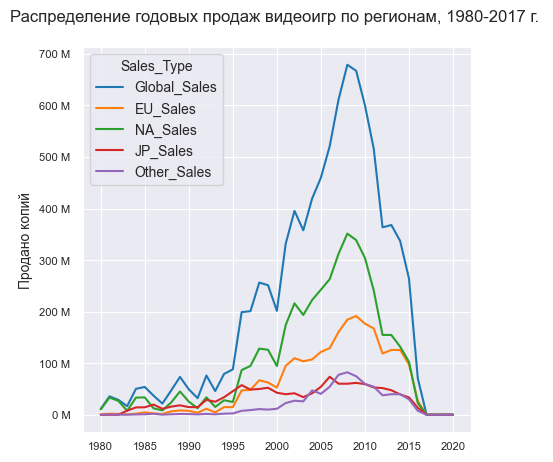

In [10]:
df_vg_regions_year = df_vg.groupby(['Year'])[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()
df_vg_regions_year = df_vg_regions_year[(df_vg_regions_year['Year'] != 0)]

fig2, ax2 = plt.subplots(figsize=(5,5))
df_vg_regions_year = df_vg_regions_year.melt(id_vars=['Year'], var_name='Sales_Type', value_name = 'Sales_Amount').sort_values(by='Year', ascending=False)

sns.lineplot(x='Year',y='Sales_Amount', hue='Sales_Type', data = df_vg_regions_year)

ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax2.set(xlabel = None)
ax2.set(ylabel = 'Продано копий')

plt.title('Распределение годовых продаж видеоигр по регионам, 1980-2017 г. \n', fontsize=12)

df_vg_platform
   Platform   NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales
16      PS2  583839995  339289998  139200000    193439999    1255639994
28     X360  601049997  280580000   12430000     85540000     979959993
17      PS3  392259999  343709999   79990000    141929998     957839996
26      Wii  507709999  268379999   69350000     80610000     926709997
4        DS  390710000  194650000  175570000     60529999     822489996
15       PS  336509996  213599999  139819999     40910000     730659998
6       GBA  187539999   75250000   47330000      7730000     318499999
19      PSP  108990000   68250000   76790000     42190000     296279998
18      PS4   96800000  123699998   14300000     43360000     278099996
13       PC   93279998  139679999     170000     24860000     258819999


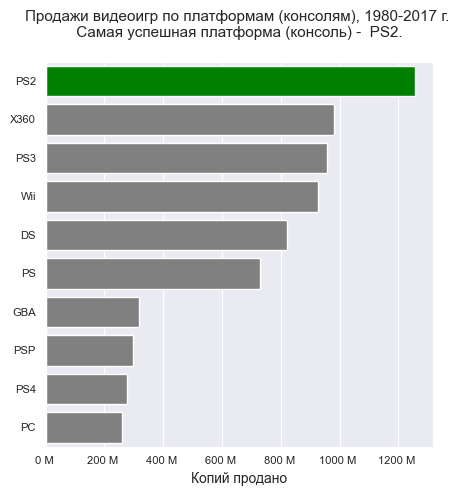

In [11]:
 #GROUP BY PLATFORMS, OUTPUT SUMS OF NA_SALES, EU_SALES, JP_SALES, TOTAL_SALES BY PUBLISHER, SORT VALUES DESC
df_vg_platform = (df_vg.groupby('Platform', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
                    .sort_values(by='Global_Sales', ascending=False))
df_vg_platform_filtered = df_vg_platform[df_vg_platform['Global_Sales']>50000000]

#PRINT #5
print('df_vg_platform')
print(df_vg_platform_filtered.head(10))



fig3, ax3 = plt.subplots(figsize=(5,5))
sns.barplot(df_vg_platform_filtered.head(10), x="Global_Sales", y="Platform", orient='h')

for i, patch in enumerate(ax3.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

ax3.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 8,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

ax3.set(xlabel = 'Копий продано')
ax3.set(ylabel = None)

plt.title('Продажи видеоигр по платформам (консолям), 1980-2017 г. \n Самая успешная платформа (консоль) -  PS2. \n', fontsize=11)

plt.show()

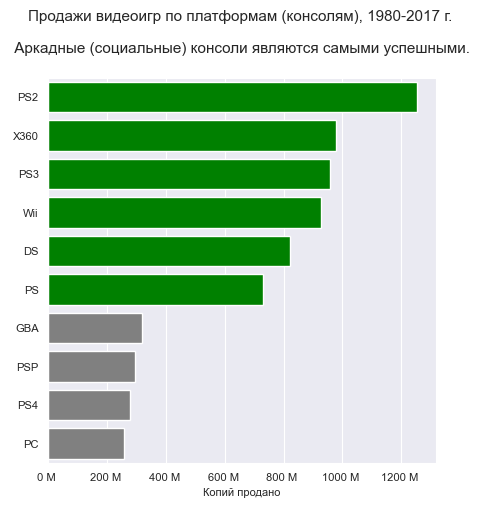

In [12]:
fig4, ax4 = plt.subplots(figsize=(5,5))
sns.barplot(df_vg_platform_filtered.head(10), x="Global_Sales", y="Platform", orient='h')

six_colors_green = ['green','green','green','green','green','green']

for i, patch in enumerate(ax4.patches):
    if i < len(six_colors_green):
        patch.set_facecolor(six_colors_green[i])
    else:
        patch.set_facecolor('gray')

ax4.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 8,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

ax4.set(xlabel = 'Копий продано')
ax4.set(ylabel = None)

plt.title('Продажи видеоигр по платформам (консолям), 1980-2017 г. \n \n Аркадные (социальные) консоли являются самыми успешными. \n', fontsize=11)

plt.show()

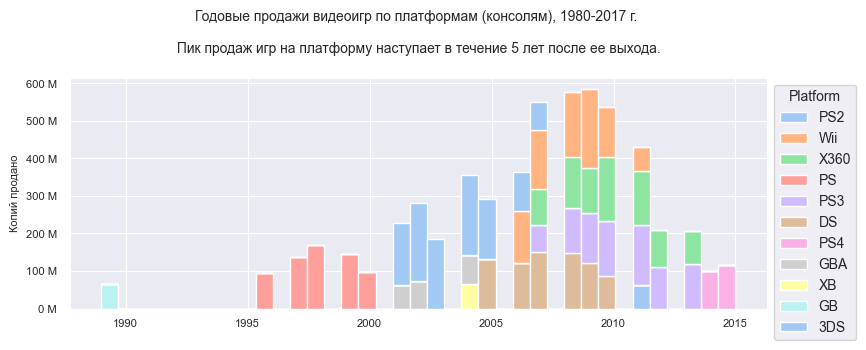

In [13]:
df_vg_year_platform = (df_vg.groupby(['Year','Platform'], as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
                       .sort_values(by='Global_Sales', ascending=False))

df_vg_year_platform = df_vg_year_platform[df_vg_year_platform['Year'] != 0]
df_vg_year_platform['Year'] = df_vg_year_platform['Year'].astype(int)
df_vg_year_platform['Year'] = df_vg_year_platform['Year'].dropna()

df_vg_year_platform_filter_var = 60000000
df_vg_year_platform_filtered = df_vg_year_platform[df_vg_year_platform['Global_Sales'] > df_vg_year_platform_filter_var]

fig5, ax5 = plt.subplots(figsize=(9,3))
sns.histplot(data = df_vg_year_platform_filtered,
             x = 'Year',
             hue = 'Platform',
             weights='Global_Sales',
             bins=37,
             palette='pastel',
             alpha = 1,
             multiple='stack')

ax5.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Годовые продажи видеоигр по платформам (консолям), 1980-2017 г. \n \n Пик продаж игр на платформу наступает в течение 5 лет после ее выхода. \n', fontsize=10)

ax5.set(xlabel = None)
ax5.set(ylabel = 'Копий продано')

sns.move_legend(ax5, "upper left", bbox_to_anchor=(1, 1))

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

Text(0.5, 1.0, 'Продажи игр в разрезе "Консоль - Жанр игры". \n \n Самая успешная пара - PS3 и жанр "экшн" \n')

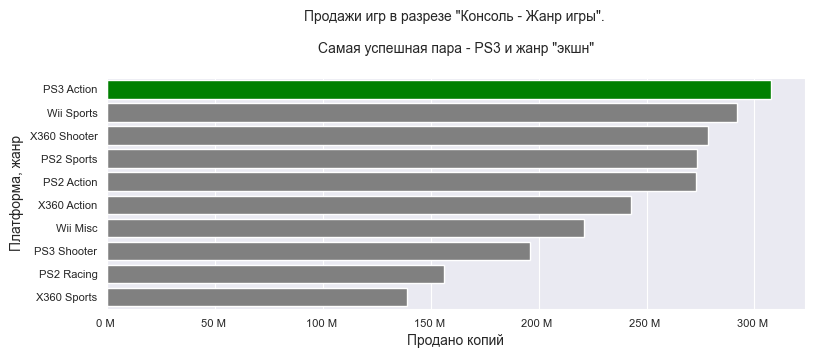

In [14]:
df_platform_genre = df_vg.groupby(['Platform', 'Genre'])['Global_Sales'].sum().to_frame().sort_values(by='Global_Sales', ascending=False).reset_index()
df_platform_genre['Platform_Genre'] = df_platform_genre['Platform'] + ' ' + df_platform_genre['Genre']

fig6, ax6 = plt.subplots(figsize=(9,3))

sns.barplot(data = df_platform_genre.head(10),
            y = 'Platform_Genre',
            x = 'Global_Sales',
            orient = 'h')

ax6.set(xlabel = 'Продано копий')
ax6.set(ylabel = 'Платформа, жанр')

for i, patch in enumerate(ax6.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

ax6.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Продажи игр в разрезе "Консоль - Жанр игры". \n \n Самая успешная пара - PS3 и жанр "экшн" \n', fontsize = 10)

[Text(0, 0.5, 'Копий продано')]

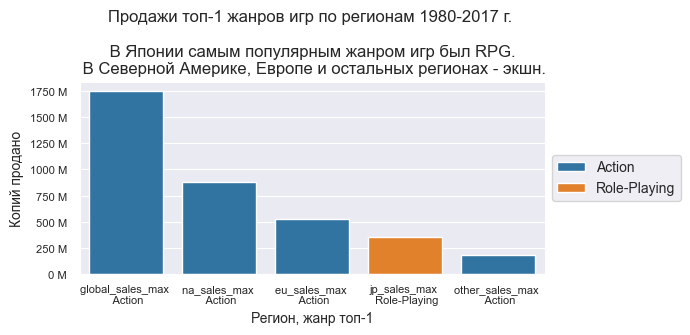

In [15]:
df_vg_max_na_sales_genre = df_vg.groupby(['Genre'])['NA_Sales'].sum().to_frame().reset_index()
df_vg_max_na_sales_genre = df_vg_max_na_sales_genre[df_vg_max_na_sales_genre['NA_Sales'] == df_vg_max_na_sales_genre['NA_Sales'].max()]
df_vg_max_na_sales_genre = df_vg_max_na_sales_genre.assign(relevant_sales_amount = df_vg_max_na_sales_genre['NA_Sales'])

df_vg_max_eu_sales_genre = df_vg.groupby(['Genre'])['EU_Sales'].sum().to_frame().reset_index()
df_vg_max_eu_sales_genre = df_vg_max_eu_sales_genre[df_vg_max_eu_sales_genre['EU_Sales'] == df_vg_max_eu_sales_genre['EU_Sales'].max()]
df_vg_max_eu_sales_genre = df_vg_max_eu_sales_genre.assign(relevant_sales_amount = df_vg_max_eu_sales_genre['EU_Sales'])

df_vg_max_jp_sales_genre = df_vg.groupby(['Genre'])['JP_Sales'].sum().to_frame().reset_index()
df_vg_max_jp_sales_genre = df_vg_max_jp_sales_genre[df_vg_max_jp_sales_genre['JP_Sales'] == df_vg_max_jp_sales_genre['JP_Sales'].max()]
df_vg_max_jp_sales_genre = df_vg_max_jp_sales_genre.assign(relevant_sales_amount = df_vg_max_jp_sales_genre['JP_Sales'])

df_vg_max_other_sales_genre = df_vg.groupby(['Genre'])['Other_Sales'].sum().to_frame().reset_index()
df_vg_max_other_sales_genre = df_vg_max_other_sales_genre[df_vg_max_other_sales_genre['Other_Sales'] == df_vg_max_other_sales_genre['Other_Sales'].max()]
df_vg_max_other_sales_genre = df_vg_max_other_sales_genre.assign(relevant_sales_amount = df_vg_max_other_sales_genre['Other_Sales'])

df_vg_max_global_sales_genre = df_vg.groupby(['Genre'])['Global_Sales'].sum().to_frame().reset_index()
df_vg_max_global_sales_genre = df_vg_max_global_sales_genre[df_vg_max_global_sales_genre['Global_Sales'] == df_vg_max_global_sales_genre['Global_Sales'].max()]
df_vg_max_global_sales_genre = df_vg_max_global_sales_genre.assign(relevant_sales_amount = df_vg_max_global_sales_genre['Global_Sales'])

df_vg_max_genre = pd.concat([df_vg_max_na_sales_genre,
                                  df_vg_max_eu_sales_genre,
                                  df_vg_max_jp_sales_genre,
                                  df_vg_max_other_sales_genre,
                                  df_vg_max_global_sales_genre],
                                 axis = 0)

df_vg_max_genre = df_vg_max_genre.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'], axis = 1)

df_vg_max_genre['Category'] = ['na_sales_max',
                               'eu_sales_max',
                               'jp_sales_max',
                               'other_sales_max',
                               'global_sales_max']

df_vg_max_genre = df_vg_max_genre.sort_values(by = 'relevant_sales_amount', ascending = False)

df_vg_max_genre['category_genre'] = df_vg_max_genre['Category'] + ' ' + '\n' +' ' + df_vg_max_genre['Genre']

fig7, ax7 = plt.subplots(figsize=(6,2.5))
sns.barplot(data = df_vg_max_genre,
            x = 'category_genre',
            y = 'relevant_sales_amount',
            hue = 'Genre')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

ax7_handles, ax7_labels = ax7.get_legend_handles_labels()
plt.legend(handles=ax7_handles, labels=ax7_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Продажи топ-1 жанров игр по регионам 1980-2017 г. \n \n В Японии самым популярным жанром игр был RPG. \n В Северной Америке, Европе и остальных регионах - экшн.',fontsize=12)

ax7.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax7.set(xlabel = 'Регион, жанр топ-1')
ax7.set(ylabel = 'Копий продано')

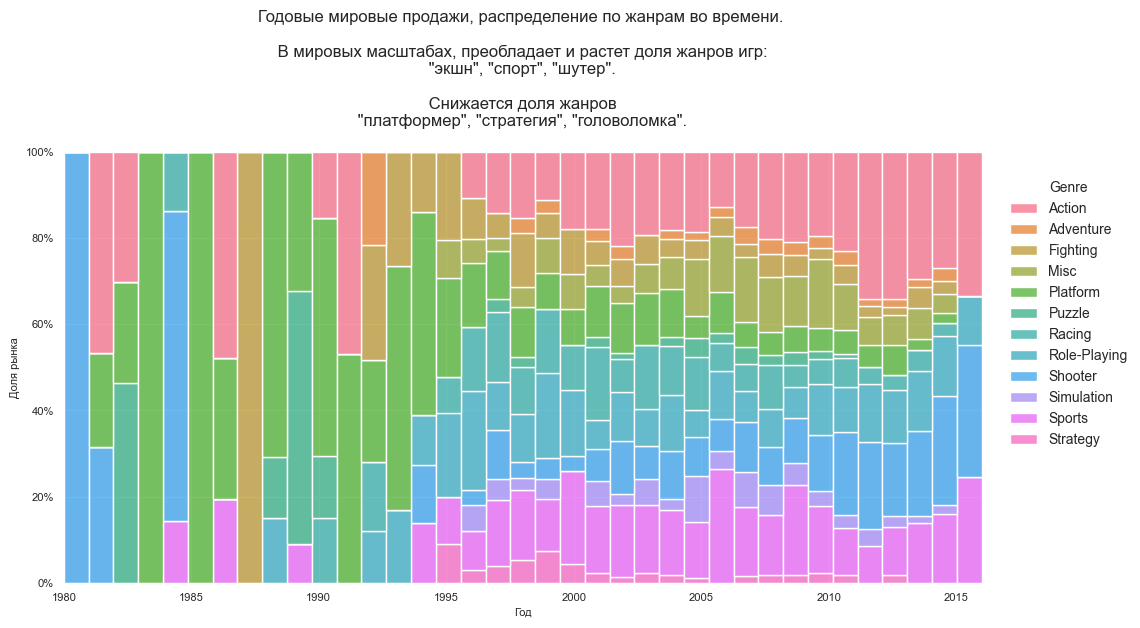

In [16]:
ax8 = sns.displot(data = df_genre_year_filtered,
            x = 'Year',
            hue = 'Genre',
            weights='Global_Sales_sum',
            multiple="fill",
            bins = 37,
            height=5, aspect=2,
            stat='percent')

for ax8_axes in ax8.axes.flat:
    ax8_axes.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

plt.title('Годовые мировые продажи, распределение по жанрам во времени. \n \n В мировых масштабах, преобладает и растет доля жанров игр: \n "экшн", "спорт", "шутер". \n \n Снижается доля жанров \n "платформер", "стратегия", "головоломка". \n', fontsize=12)

ax8.set(xlabel = 'Год')
ax8.set(ylabel = 'Доля рынка')

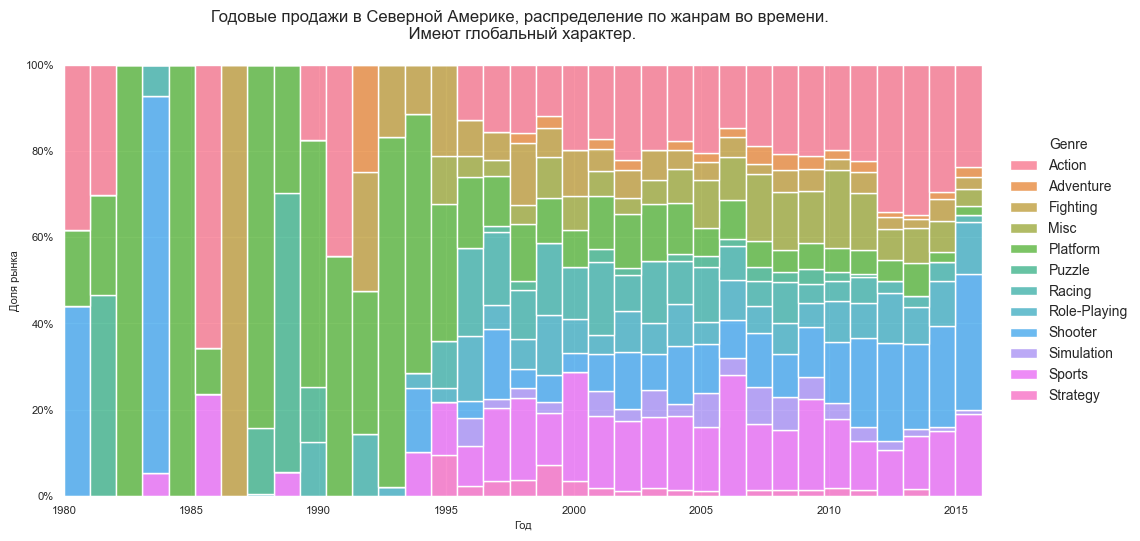

In [17]:
ax9 = sns.displot(data = df_genre_year_filtered,
            x = 'Year',
            hue = 'Genre',
            weights='NA_Sales_sum',
            multiple="fill",
            bins = 35,
            height=5, aspect=2,
            stat='percent')

for ax9_axes in ax9.axes.flat:
    ax9_axes.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

plt.title('Годовые продажи в Северной Америке, распределение по жанрам во времени. \n Имеют глобальный характер. \n', fontsize=12)
plt.ylabel('Продажи')
plt.xlabel('Год')

ax9.set(xlabel = 'Год')
ax9.set(ylabel = 'Доля рынка')

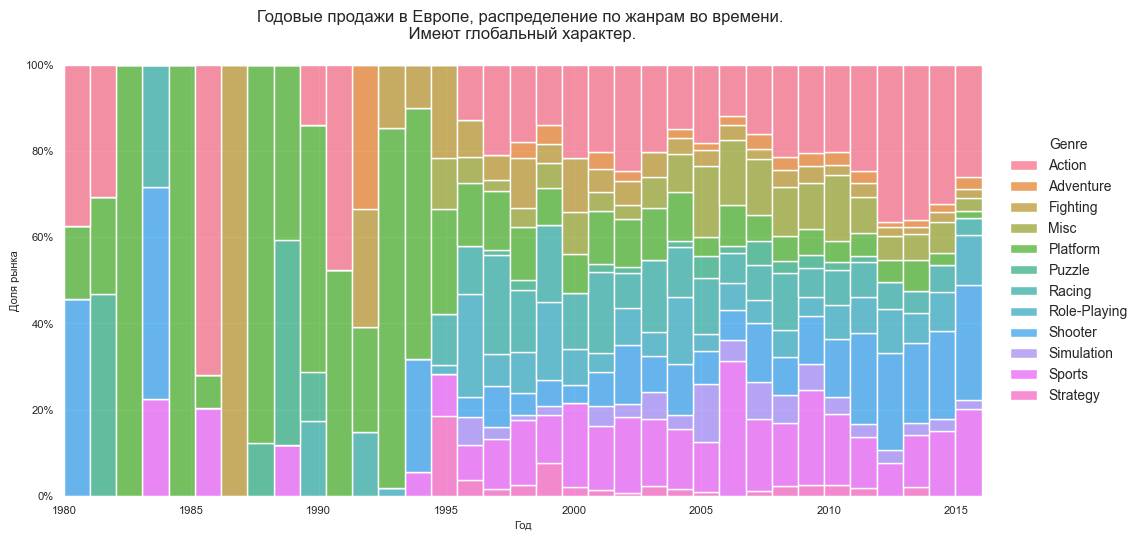

In [18]:
ax10 = sns.displot(data = df_genre_year_filtered,
            x = 'Year',
            hue = 'Genre',
            weights='EU_Sales_sum',
            multiple="fill",
            bins = 35,
            height=5, aspect=2,
            stat='percent')

for ax10_axes in ax10.axes.flat:
    ax10_axes.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

plt.title('Годовые продажи в Европе, распределение по жанрам во времени. \n Имеют глобальный характер. \n', fontsize=12)


ax10.set(xlabel = 'Год')
ax10.set(ylabel = 'Доля рынка')

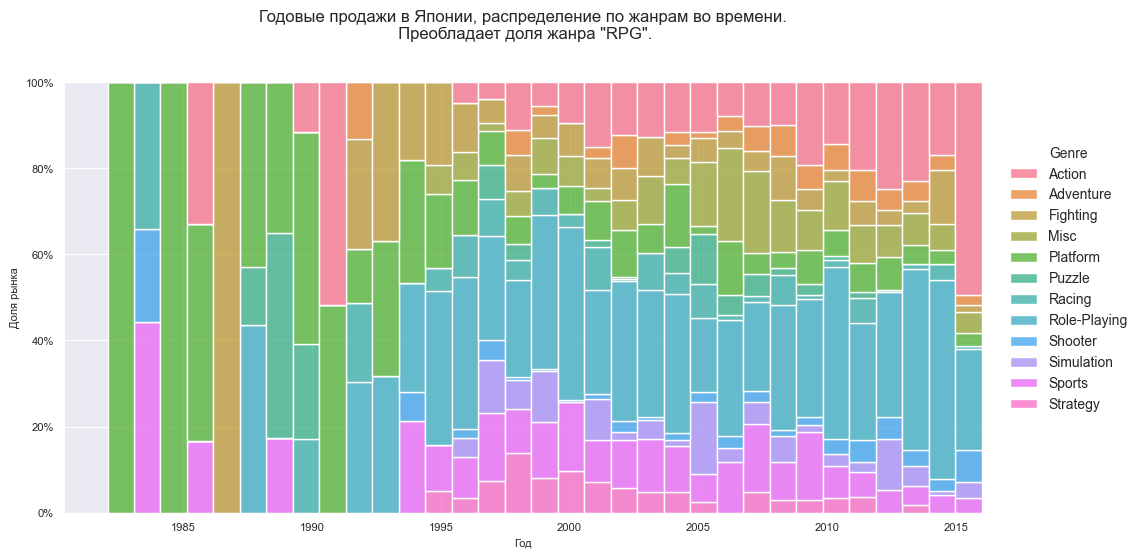

In [19]:
ax11 = sns.displot(data = df_genre_year_filtered,
            x = 'Year',
            hue = 'Genre',
            weights='JP_Sales_sum',
            multiple="fill",
            bins = 35,
            height=5, aspect=2,
            stat='percent')

for ax11_axes in ax11.axes.flat:
    ax11_axes.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

plt.title('Годовые продажи в Японии, распределение по жанрам во времени.\n  Преобладает доля жанра "RPG". \n \n', fontsize=12)

ax11.set(xlabel = 'Год')
ax11.set(ylabel = 'Доля рынка')

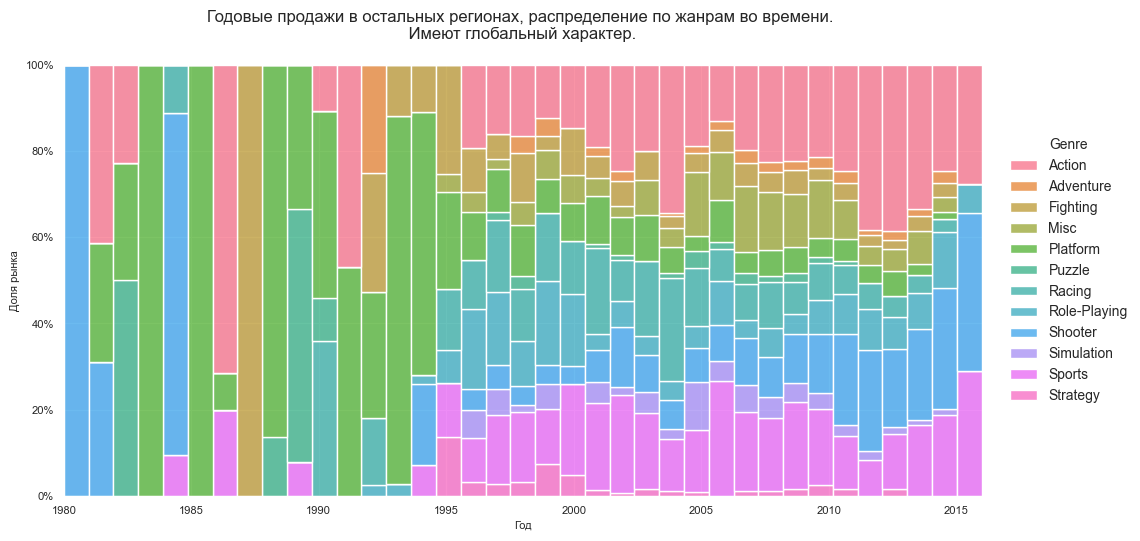

In [20]:
ax12 = sns.displot(data = df_genre_year_filtered,
            x = 'Year',
            hue = 'Genre',
            weights='Other_Sales_sum',
            multiple="fill",
            bins = 37,
            height=5, aspect=2,
            stat='percent')



for ax12_axes in ax12.axes.flat:
    ax12_axes.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

plt.title('Годовые продажи в остальных регионах, распределение по жанрам во времени. \n Имеют глобальный характер. \n', fontsize=12)

ax12.set(xlabel = 'Год')
ax12.set(ylabel = 'Доля рынка')

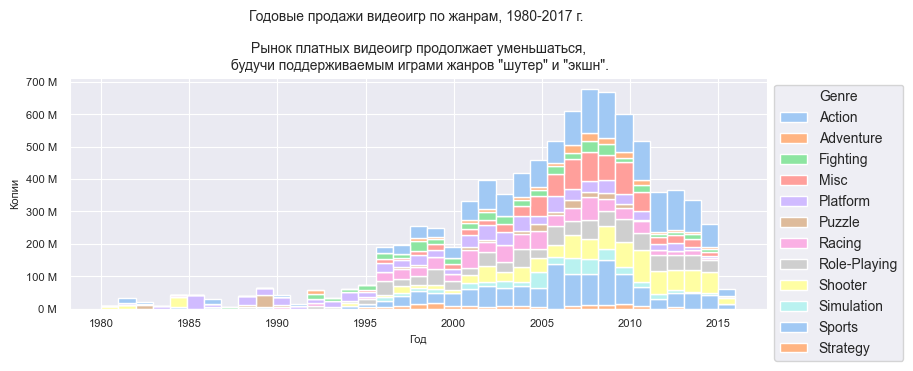

In [21]:
fig13, ax13 = plt.subplots(figsize=(9,3))
sns.histplot(data = df_genre_year_filtered,
             x = 'Year',
             hue = 'Genre',
             weights='Global_Sales_sum',
             bins=37,
             palette='pastel',
             alpha = 1,
             multiple='stack')

plt.ticklabel_format(style='plain', axis='y')
ax13.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax13.set(xlabel = 'Год')
ax13.set(ylabel = 'Копии')

plt.title('Годовые продажи видеоигр по жанрам, 1980-2017 г. \n \n Рынок платных видеоигр продолжает уменьшаться, \n будучи поддерживаемым играми жанров "шутер" и "экшн".',fontsize=10)

sns.move_legend(ax13, "upper left", bbox_to_anchor=(1, 1))

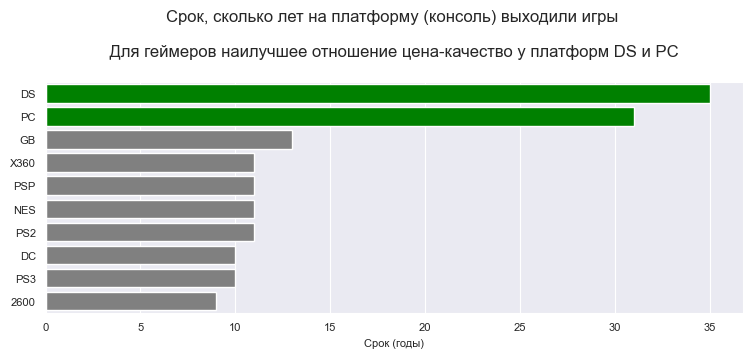

In [22]:
df_platform_use = df_vg_year_platform
df_platform_use['platform_min_year'] = df_platform_use.groupby(['Platform'])['Year'].transform("min")
df_platform_use['platform_max_year'] = df_platform_use.groupby(['Platform'])['Year'].transform("max")
df_platform_use['platform_time_in_market'] = (df_platform_use['platform_max_year'] - df_platform_use['platform_min_year'])
df_platform_use = df_platform_use.groupby(['Platform'], as_index=False)['platform_time_in_market'].max()
df_platform_use_filtered = df_platform_use[df_platform_use['platform_time_in_market']>5].sort_values('platform_time_in_market', ascending=False)

fig14, ax14 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_platform_use_filtered.head(10),
            x = 'platform_time_in_market',
            y = 'Platform',
            orient='h')

double_color_green = ['green', 'green']

for i, patch in enumerate(ax14.patches):
    if i < len(double_color_green):
        patch.set_facecolor(double_color_green[i])
    else:
        patch.set_facecolor('gray')

ax14.set(ylabel = None)
ax14.set(xlabel = 'Срок (годы)')

plt.title('Срок, сколько лет на платформу (консоль) выходили игры \n \n Для геймеров наилучшее отношение цена-качество у платформ DS и PC \n',fontsize=12)

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 10,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

Text(0.5, 1.0, 'Продажи видеоигр по жанрам, 1980-2017 г.\n \n Самый успешный жанр в мире - экшн. \n')

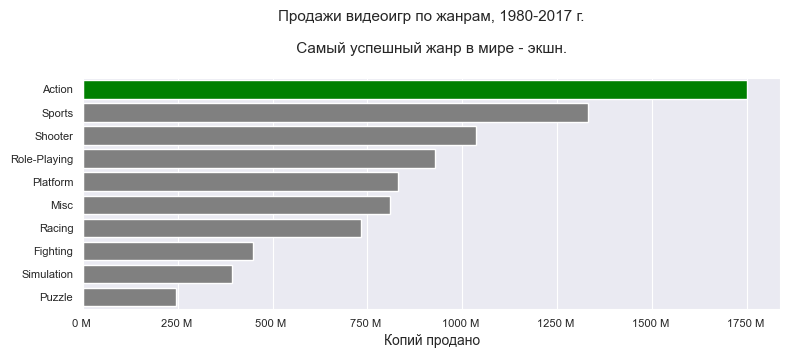

In [23]:
df_vg_genres = (df_vg.groupby('Genre', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
                .sort_values(by='Global_Sales', ascending=False))

fig15, ax15 = plt.subplots(figsize=(9,3))
sns.barplot(df_vg_genres.head(10), x="Global_Sales", y="Genre",orient='h')

ax15.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

for i, patch in enumerate(ax15.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

ax15.set(xlabel = 'Копий продано')
ax15.set(ylabel = None)

plt.title('Продажи видеоигр по жанрам, 1980-2017 г.\n \n Самый успешный жанр в мире - экшн. \n', fontsize=11)

# plt.show()

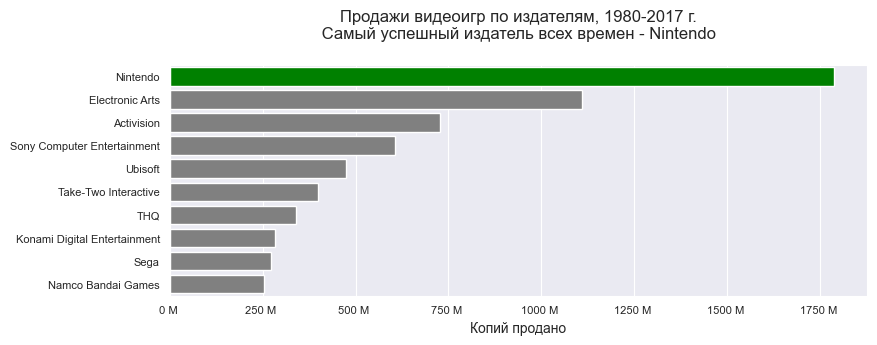

In [24]:
df_vg_publishers = (df_vg.groupby('Publisher', as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
                    .sort_values(by='Global_Sales', ascending=False))

df_vg_publishers = df_vg_publishers[df_vg_publishers['Publisher'] != 0]

df_vg_publishers_filtered = df_vg_publishers[df_vg_publishers['Global_Sales'] > 100000000]

fig16, ax16 = plt.subplots(figsize=(9,3))
sns.barplot(df_vg_publishers_filtered.head(10),
            x="Global_Sales",
            y="Publisher",
            orient="h")

for i, patch in enumerate(ax16.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

ax16.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 7,
                     'ytick.labelsize': 8})

ax16.set(xlabel = 'Копий продано')
ax16.set(ylabel = None)

plt.title('Продажи видеоигр по издателям, 1980-2017 г.\n Самый успешный издатель всех времен - Nintendo \n', fontsize=12)

plt.show()

df_global_sales_percentage
                       Publisher   NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales  NAMarketCap%  EUMarketCap%  JPMarketCap%  OtherMarketCap%  GlobalMarketCap%
360                     Nintendo  816869996  418739997  455419999     95329999    1786559997            18            17            35               11                20
139              Electronic Arts  595069993  371270000   14040000    129769999    1110319993            13            15             1               16                12
22                    Activision  429699999  215529998    6540000     75340000     727459999             9             8             0                9                 8
457  Sony Computer Entertainment  265219997  187719997   74100000     80450000     607500000             6             7             5               10                 6
526                      Ubisoft  253429998  163320000    7500000     50260000     474719997             5             6   

[Text(0, 0.5, '')]

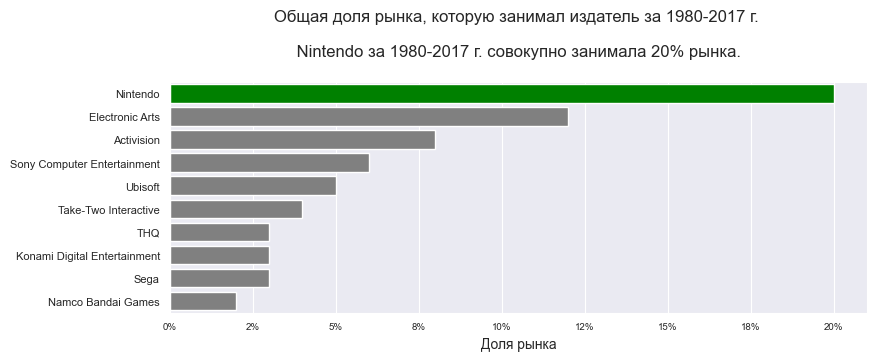

In [25]:
df_sales_percentage = df_vg_publishers

df_sales_percentage['NAMarketCap%'] =  ((df_sales_percentage['NA_Sales'] / df_sales_percentage['NA_Sales'].sum()) * 100).astype(int)
df_sales_percentage['EUMarketCap%'] =  ((df_sales_percentage['EU_Sales'] / df_sales_percentage['EU_Sales'].sum()) * 100).astype(int)
df_sales_percentage['JPMarketCap%'] =  ((df_sales_percentage['JP_Sales'] / df_sales_percentage['JP_Sales'].sum()) * 100).astype(int)
df_sales_percentage['OtherMarketCap%'] =  ((df_sales_percentage['Other_Sales'] / df_sales_percentage['Other_Sales'].sum()) * 100).astype(int)
df_sales_percentage['GlobalMarketCap%'] =  ((df_sales_percentage['Global_Sales'] / df_sales_percentage['Global_Sales'].sum()) * 100).astype(int)

df_sales_percentage_filtered = df_sales_percentage[df_sales_percentage['GlobalMarketCap%']>1]
#PRINT #12
print('df_global_sales_percentage')
print(df_sales_percentage.head())

fig17, ax17 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_sales_percentage_filtered.head(10),
            x = 'GlobalMarketCap%',
            y = 'Publisher',
            orient='h')

for i, patch in enumerate(ax17.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 10})

plt.title('Общая доля рынка, которую занимал издатель за 1980-2017 г. \n \n Nintendo за 1980-2017 г. совокупно занимала 20% рынка. \n',fontsize=12)
ax17.xaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

ax17.set(xlabel = 'Доля рынка')
ax17.set(ylabel = None)

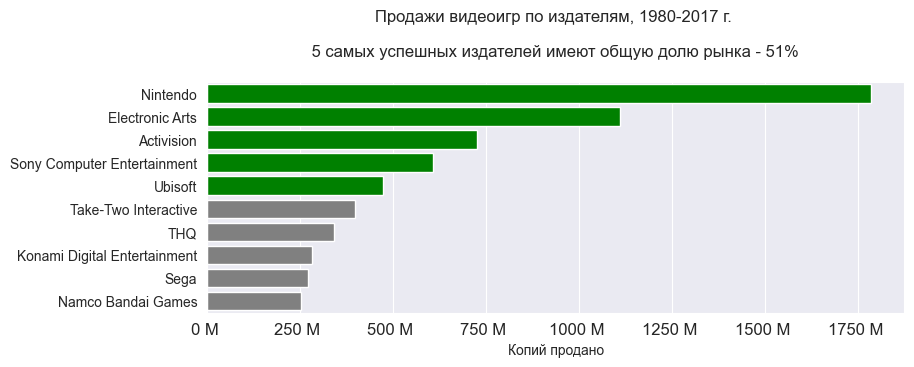

In [26]:
fig18, ax18 = plt.subplots(figsize=(9,3))
sns.barplot(df_vg_publishers_filtered.head(10),
            x="Global_Sales",
            y="Publisher",
            orient="h")

five_green_colors = ['green','green','green','green','green']

for i, patch in enumerate(ax18.patches):
    if i < len(five_green_colors):
        patch.set_facecolor(five_green_colors[i])
    else:
        patch.set_facecolor('gray')

ax18.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 7,
                     'ytick.labelsize': 8})

ax18.set(xlabel = 'Копий продано')
ax18.set(ylabel = None)

plt.title('Продажи видеоигр по издателям, 1980-2017 г. \n \n 5 самых успешных издателей имеют общую долю рынка - 51% \n', fontsize=12)

plt.show()

[Text(0, 0.5, '')]

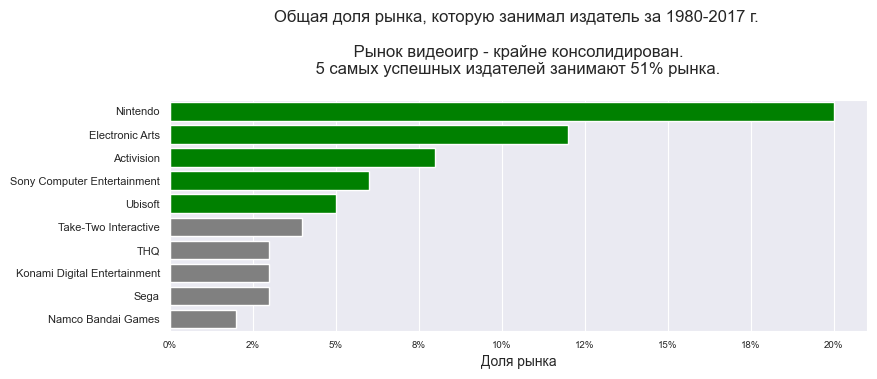

In [27]:
fig19, ax19 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_sales_percentage_filtered.head(10),
            x = 'GlobalMarketCap%',
            y = 'Publisher',
            orient='h')

for i, patch in enumerate(ax19.patches):
    if i < len(five_green_colors):
        patch.set_facecolor(five_green_colors[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 10})

plt.title('Общая доля рынка, которую занимал издатель за 1980-2017 г. \n \n Рынок видеоигр - крайне консолидирован. \n 5 самых успешных издателей занимают 51% рынка. \n',fontsize=12)
ax19.xaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

ax19.set(xlabel = 'Доля рынка')
ax19.set(ylabel = None)

[Text(0, 0.5, 'Доля рынка')]

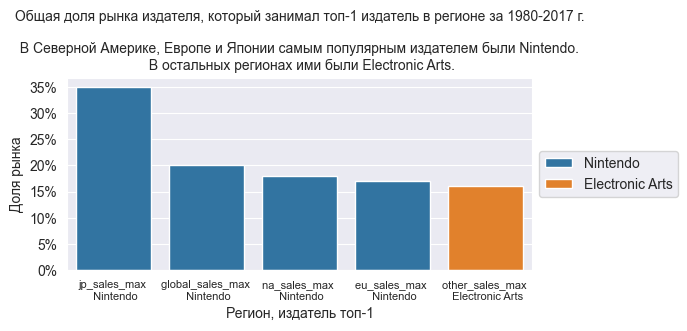

In [28]:
df_na_sales_max = df_vg_publishers.loc[df_vg_publishers['NA_Sales'] == df_vg_publishers['NA_Sales'].max()]
df_na_sales_max = df_na_sales_max.assign(relevant_market_cap = df_na_sales_max['NAMarketCap%'])

df_eu_sales_max = df_vg_publishers.loc[df_vg_publishers['EU_Sales'] == df_vg_publishers['EU_Sales'].max()]
df_eu_sales_max = df_eu_sales_max.assign(relevant_market_cap = df_eu_sales_max['EUMarketCap%'])

df_jp_sales_max = df_vg_publishers[df_vg_publishers['JP_Sales'] == df_vg_publishers['JP_Sales'].max()]
df_jp_sales_max = df_jp_sales_max.assign(relevant_market_cap =  df_na_sales_max['JPMarketCap%'])

df_other_sales_max = df_vg_publishers[df_vg_publishers['Other_Sales'] == df_vg_publishers['Other_Sales'].max()]
df_other_sales_max = df_other_sales_max.assign(relevant_market_cap =  df_other_sales_max['OtherMarketCap%'])

df_global_sales_max = df_vg_publishers[df_vg_publishers['Global_Sales'] == df_vg_publishers['Global_Sales'].max()]
df_global_sales_max = df_global_sales_max.assign(relevant_market_cap =  df_na_sales_max['GlobalMarketCap%'])

df_vg_max_market_cap = pd.concat([df_na_sales_max,
                                  df_eu_sales_max,
                                  df_jp_sales_max,
                                  df_other_sales_max,
                                  df_global_sales_max],
                                 axis = 0)

df_vg_max_market_cap['Category'] = ['na_sales_max',
                                    'eu_sales_max',
                                    'jp_sales_max',
                                    'other_sales_max',
                                    'global_sales_max']

df_vg_max_market_cap.drop (['NA_Sales',
                            'EU_Sales',
                            'JP_Sales',
                            'Other_Sales',
                            'Global_Sales',
                            'NAMarketCap%',
                            'EUMarketCap%',
                            'JPMarketCap%',
                            'OtherMarketCap%',
                            'GlobalMarketCap%'],
                           axis = 1,
                           inplace = True)


df_vg_max_market_cap['category_top_publisher'] = df_vg_max_market_cap['Category'] + ' ' + '\n' + ' ' + df_vg_max_market_cap['Publisher']

df_vg_max_market_cap = df_vg_max_market_cap.sort_values(by='relevant_market_cap', ascending = False)

ax20_colors = ['red' if 'Nintendo' in df_vg_max_market_cap['category_top_publisher']
               else 'blue' for ax20_color in df_vg_max_market_cap['category_top_publisher']]

fig20, ax20 = plt.subplots(figsize=(6,2.5))
sns.barplot(data = df_vg_max_market_cap,
            x = 'category_top_publisher',
            y = 'relevant_market_cap',
            hue = 'Publisher')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 15,
                     'axes.labelsize': 10,
                     'xtick.labelsize': 8,
                     'ytick.labelsize': 8})

ax20_handles, ax20_labels = ax20.get_legend_handles_labels()
plt.legend(handles=ax20_handles, labels=ax20_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Общая доля рынка издателя, который занимал топ-1 издатель в регионе за 1980-2017 г.\n \n В Северной Америке, Европе и Японии самым популярным издателем были Nintendo. \n В остальных регионах ими были Electronic Arts.',fontsize=10)
ax20.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))

ax20.tick_params(axis='x', labelsize=8)

ax20.set(xlabel = 'Регион, издатель топ-1')
ax20.set(ylabel = 'Доля рынка')

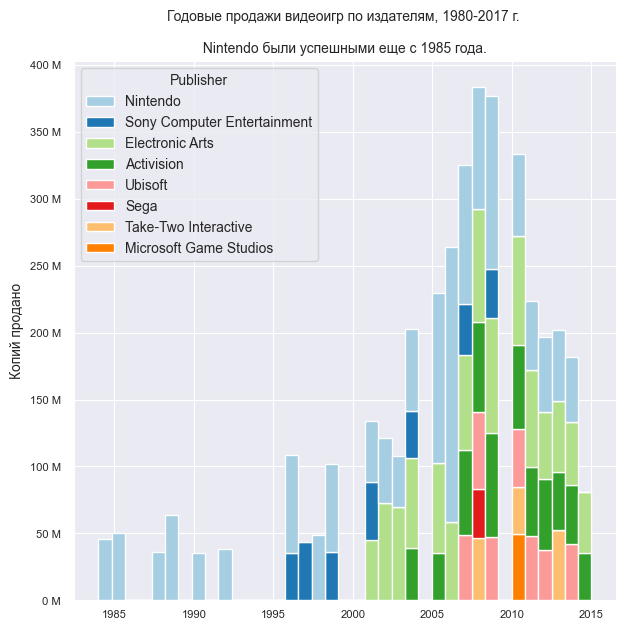

In [29]:
#GROUP BY YEAR, PUBLISHER OUTPUT SUMS OF NA_SALES, EU_SALES, JP_SALES, TOTAL_SALES BY PUBLISHER, SORT VALUES DESC, DELETE YEAR 0 PAIRS
df_vg_year_publisher = (df_vg.groupby(['Year','Publisher'], as_index=False)[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
                    .sort_values(by='Year', ascending=True))
df_vg_year_publisher = df_vg_year_publisher[df_vg_year_publisher['Year'] != 0] #DELETE YEAR 0 PAIRS
df_vg_year_publisher['Year']=df_vg_year_publisher['Year'].astype(int)
df_vg_year_publisher_filter_var:int = 35000000
df_vg_year_publisher_filtered = df_vg_year_publisher[df_vg_year_publisher['Global_Sales']>df_vg_year_publisher_filter_var]

fig21, ax21 = plt.subplots(figsize=(7,7))
sns.histplot(data = df_vg_year_publisher_filtered,
             x = 'Year',
             # ylabel = 'Global_Sales',
             hue = 'Publisher',
             weights ='Global_Sales',
             bins=37,
             palette='Paired',
             alpha = 1,
             multiple='stack')

ax21.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title(f"Годовые продажи видеоигр по издателям, 1980-2017 г. \n \n Nintendo были успешными еще с 1985 года. ", fontsize=10)
plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 15,    # Title font size
                     'axes.labelsize': 10,     # X and Y label font size
                     'xtick.labelsize': 8,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax21.set(xlabel = None)
ax21.set(ylabel = 'Копий продано')

plt.show()

4392949977
2434129988
1291019997
797749996


Text(0.5, 1.0, 'Распределение видеоигр продаж игр по регионам, 1980-2017 г. \n \n Наибольшую ценность для издателей, разработчиков и инвесторов \n имеет рынок Северной Америки.')

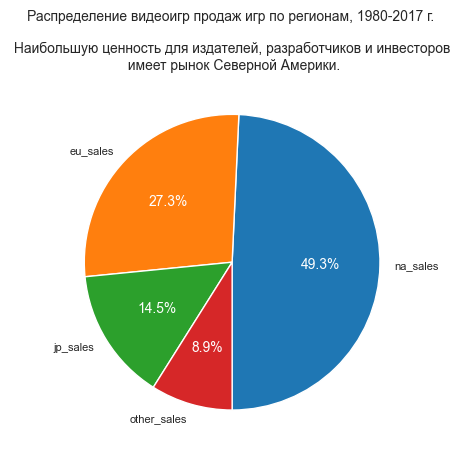

In [30]:
na_sales_sum = df_vg['NA_Sales'].sum()
print(na_sales_sum)
eu_sales_sum = df_vg['EU_Sales'].sum()
print(eu_sales_sum)
jp_sales_sum = df_vg['JP_Sales'].sum()
print(jp_sales_sum)
other_sales_sum = df_vg['Other_Sales'].sum()
print(other_sales_sum)

df_vg_regions_dict = {
    'na_sales': [na_sales_sum],
    'eu_sales': [eu_sales_sum],
    'jp_sales': [jp_sales_sum],
    'other_sales': [other_sales_sum]
}

df_vg_regions = pd.DataFrame(df_vg_regions_dict).T.reset_index()
df_vg_regions.rename(columns={'index': 'Sales_Type'}, inplace=True)
df_vg_regions.rename(columns={df_vg_regions.columns[1]: 'Sales_Amount'}, inplace=True)

df_vg_regions = df_vg_regions.sort_values(by=['Sales_Amount'], ascending=False)

patches, texts, autotexts = plt.pie(df_vg_regions['Sales_Amount'],labels = df_vg_regions['Sales_Type'], autopct='%.1f%%', startangle = 270)

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Распределение видеоигр продаж игр по регионам, 1980-2017 г. \n \n Наибольшую ценность для издателей, разработчиков и инвесторов \n имеет рынок Северной Америки.', fontsize=10)

[Text(0, 0.5, '')]

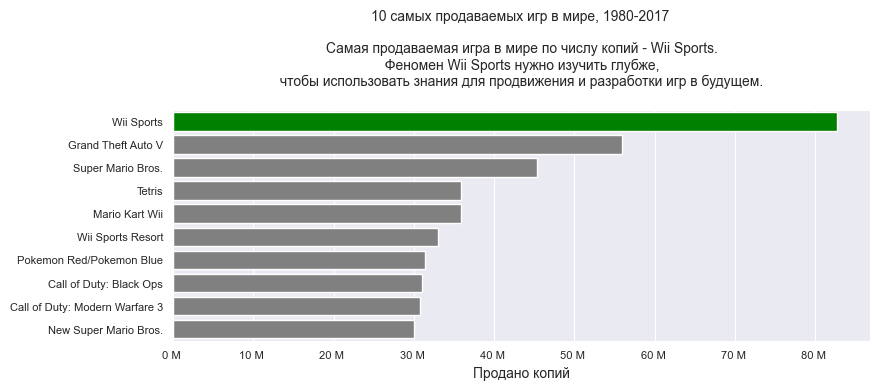

In [31]:
df_vg_games_sort_global_sales = df_vg.groupby(['Name'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).reset_index()
df_vg_games_sort_na_sales = df_vg_games_sort_global_sales.sort_values(by = 'NA_Sales',ascending=False)
df_vg_games_sort_eu_sales = df_vg_games_sort_global_sales.sort_values(by = 'EU_Sales',ascending=False)
df_vg_games_sort_jp_sales = df_vg_games_sort_global_sales.sort_values(by = 'JP_Sales',ascending=False)
df_vg_games_sort_other_sales = df_vg_games_sort_global_sales.sort_values(by = 'Other_Sales',ascending=False)


# Iterate through the patches (bars) and set their colors

fig22, ax22 = plt.subplots(figsize=(9,3))


sns.barplot(data = df_vg_games_sort_global_sales.head(10),
            y = 'Name',
            x = 'Global_Sales',
            orient = 'h')

single_color_green = ['green']

for i, patch in enumerate(ax22.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 10,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 8})

ax22.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в мире, 1980-2017 \n \n Самая продаваемая игра в мире по числу копий - Wii Sports. \n Феномен Wii Sports нужно изучить глубже, \n чтобы использовать знания для продвижения и разработки игр в будущем. \n ')

ax22.set(xlabel = 'Продано копий')
ax22.set(ylabel = None)

[Text(0, 0.5, '')]

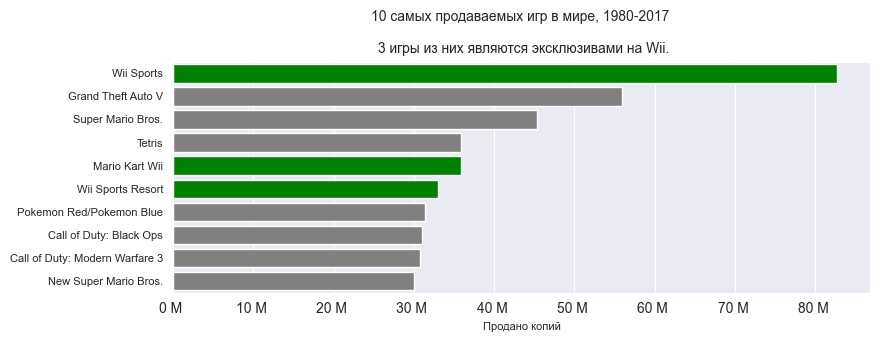

In [32]:
fig23, ax23 = plt.subplots(figsize=(9,3))

sns.barplot(data = df_vg_games_sort_global_sales.head(10),
            y = 'Name',
            x = 'Global_Sales',
            orient = 'h')

one_five_six_green = ['green','grey','grey','grey','green','green']
for i, patch in enumerate(ax23.patches):
    if i < len(one_five_six_green):
        patch.set_facecolor(one_five_six_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax23.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в мире, 1980-2017 \n \n 3 игры из них являются эксклюзивами на Wii.')

ax23.set(xlabel = 'Продано копий')
ax23.set(ylabel = None)

[Text(0, 0.5, '')]

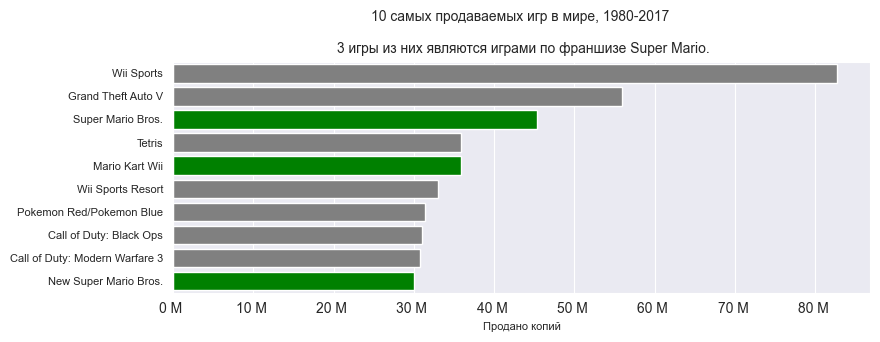

In [33]:
fig24, ax24 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_global_sales.head(10),
            y = 'Name',
            x = 'Global_Sales',
            orient = 'h')

three_five_ten_green = ['grey','grey','green','grey', 'green','grey','grey','grey','grey','green']

for i, patch in enumerate(ax24.patches):
    if i < len(three_five_ten_green):
        patch.set_facecolor(three_five_ten_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 10,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 8})

ax24.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в мире, 1980-2017 \n \n 3 игры из них являются играми по франшизе Super Mario.')

ax24.set(xlabel = 'Продано копий')
ax24.set(ylabel = None)

[Text(0, 0.5, '')]

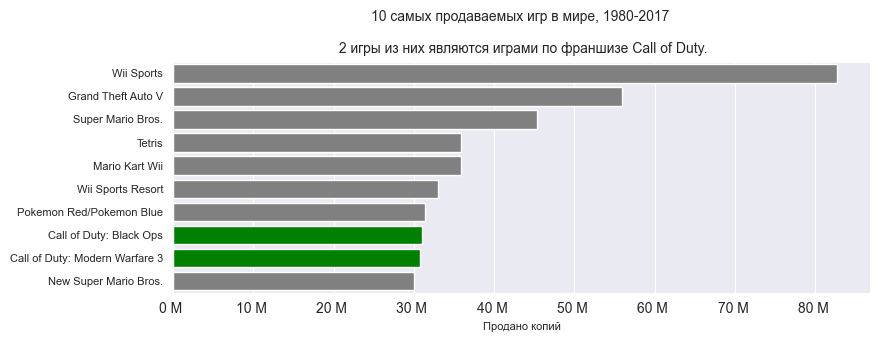

In [34]:
fig25, ax25 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_global_sales.head(10),
            y = 'Name',
            x = 'Global_Sales',
            orient = 'h')

eight_nine_green = ['grey','grey','grey','grey','grey','grey','grey','green','green']

for i, patch in enumerate(ax25.patches):
    if i < len(eight_nine_green):
        patch.set_facecolor(eight_nine_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax25.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в мире, 1980-2017 \n \n 2 игры из них являются играми по франшизе Call of Duty.')

ax25.set(xlabel = 'Продано копий')
ax25.set(ylabel = None)

[Text(0, 0.5, '')]

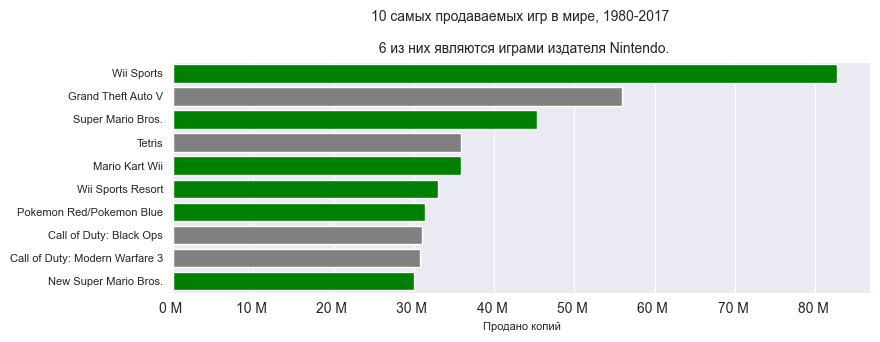

In [35]:
fig26, ax26 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_global_sales.head(10),
            y = 'Name',
            x = 'Global_Sales',
            orient = 'h')

one_three_five_six_seven_ten_green = ['green','grey','green','grey','green','green','green','grey','grey','green']

ax26.xaxis.set_major_formatter(FuncFormatter(millions_formatter))


for i, patch in enumerate(ax26.patches):
    if i < len(one_three_five_six_seven_ten_green):
        patch.set_facecolor(one_three_five_six_seven_ten_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 10,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 8})

ax26.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в мире, 1980-2017 \n \n 6 из них являются играми издателя Nintendo.')

ax26.set(xlabel = 'Продано копий')
ax26.set(ylabel = None)

[Text(0, 0.5, '')]

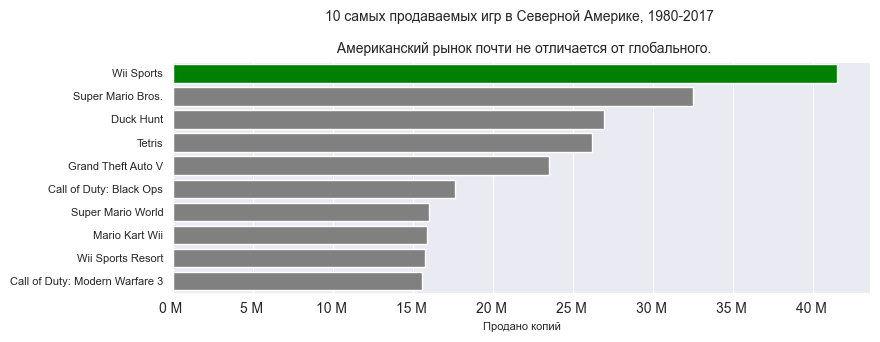

In [36]:
fig27, ax27 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_na_sales.head(10),
            y = 'Name',
            x = 'NA_Sales',
            orient = 'h')

for i, patch in enumerate(ax27.patches):
    if i < len(single_color_green):
        patch.set_facecolor(single_color_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax27.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в Северной Америке, 1980-2017 \n \n Американский рынок почти не отличается от глобального.')

ax27.set(xlabel = 'Продано копий')
ax27.set(ylabel = None)

[Text(0, 0.5, '')]

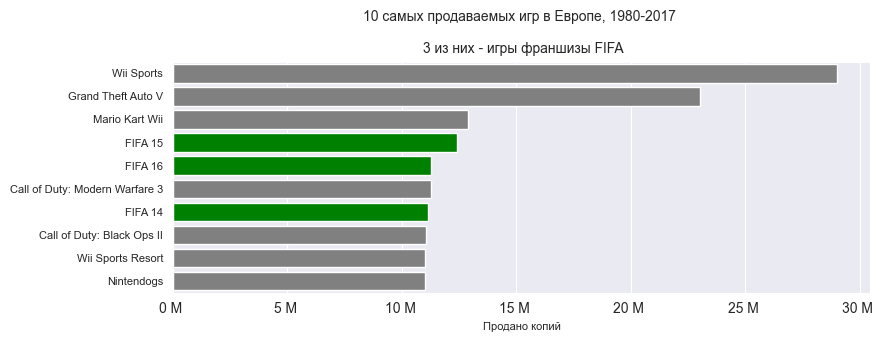

In [37]:
fig28, ax28 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_eu_sales.head(10),
            y = 'Name',
            x = 'EU_Sales',
            orient = 'h')

four_five_seven_green = ['grey','grey','grey','green','green','grey','green']

for i, patch in enumerate(ax28.patches):
    if i < len(four_five_seven_green):
        patch.set_facecolor(four_five_seven_green[i])
    else:
        # Handle cases where there are more bins than custom colors
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax28.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в Европе, 1980-2017 \n \n 3 из них - игры франшизы FIFA')

ax28.set(xlabel = 'Продано копий')
ax28.set(ylabel = None)

[Text(0, 0.5, '')]

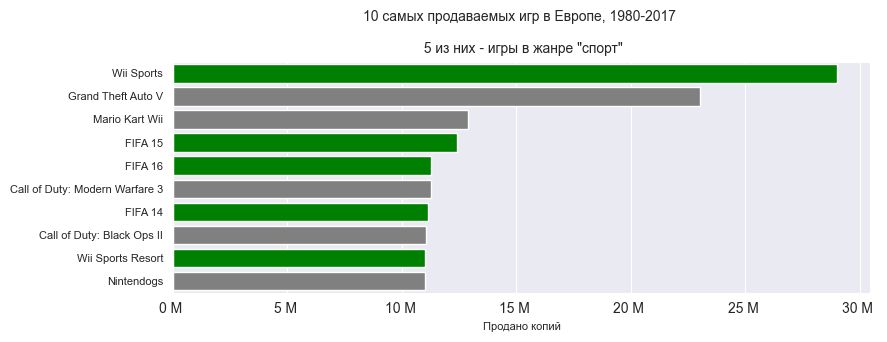

In [38]:
fig29, ax29 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_eu_sales.head(10),
            y = 'Name',
            x = 'EU_Sales',
            orient = 'h')

one_four_five_seven_nine_green = ['green','grey','grey','green','green','grey','green','grey','green']

for i, patch in enumerate(ax29.patches):
    if i < len(one_four_five_seven_nine_green):
        patch.set_facecolor(one_four_five_seven_nine_green[i])
    else:
        # Handle cases where there are more bins than custom colors
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax29.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в Европе, 1980-2017 \n \n 5 из них - игры в жанре "спорт"')

ax29.set(xlabel = 'Продано копий')
ax29.set(ylabel = None)

[Text(0, 0.5, '')]

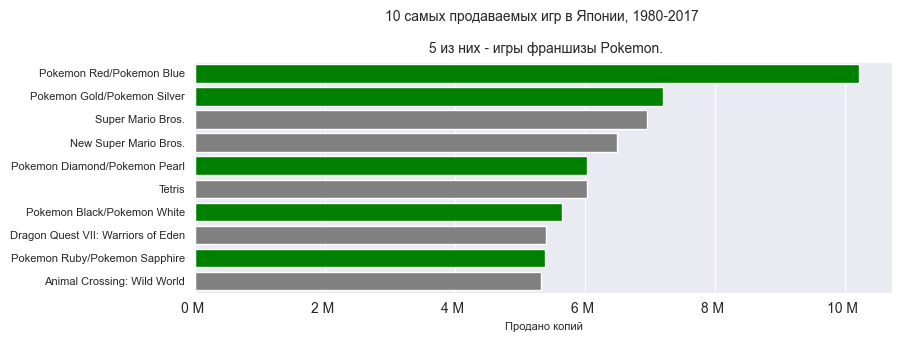

In [39]:
fig30, ax30 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_jp_sales.head(10),
            y = 'Name',
            x = 'JP_Sales',
            orient = 'h')

one_two_five_seven_nine_green = ['green','green','grey','grey','green','grey','green','grey','green']

for i, patch in enumerate(ax30.patches):
    if i < len(one_two_five_seven_nine_green):
        patch.set_facecolor(one_two_five_seven_nine_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax30.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в Японии, 1980-2017 \n \n 5 из них - игры франшизы Pokemon.')

ax30.set(xlabel = 'Продано копий')
ax30.set(ylabel = None)

## 3. Сгруппируем суммы продаж регионов по платформам (консолям)
Та же логика, только группируем по `'Platform'` и суммам `'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'`

[Text(0, 0.5, '')]

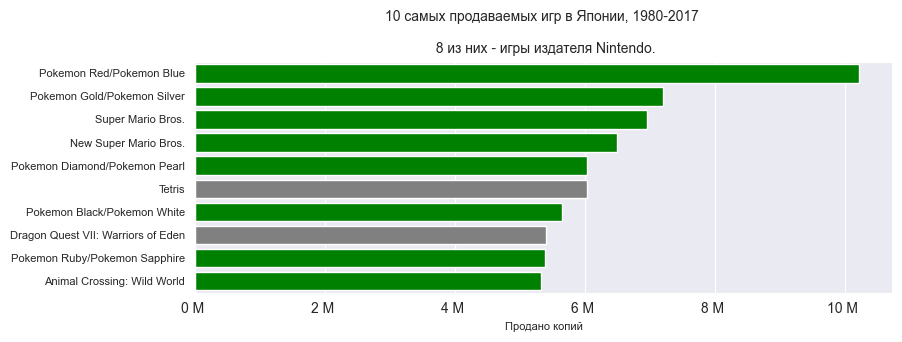

In [40]:
fig31, ax31 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_jp_sales.head(10),
            y = 'Name',
            x = 'JP_Sales',
            orient = 'h')

one_two_three_four_five_seven_nine_ten_green = ['green','green','green','green','green','grey','green','grey','green','green']

for i, patch in enumerate(ax31.patches):
    if i < len(one_two_three_four_five_seven_nine_ten_green):
        patch.set_facecolor(one_two_three_four_five_seven_nine_ten_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax31.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в Японии, 1980-2017 \n \n 8 из них - игры издателя Nintendo.')

ax31.set(xlabel = 'Продано копий')
ax31.set(ylabel = None)

[Text(0, 0.5, '')]

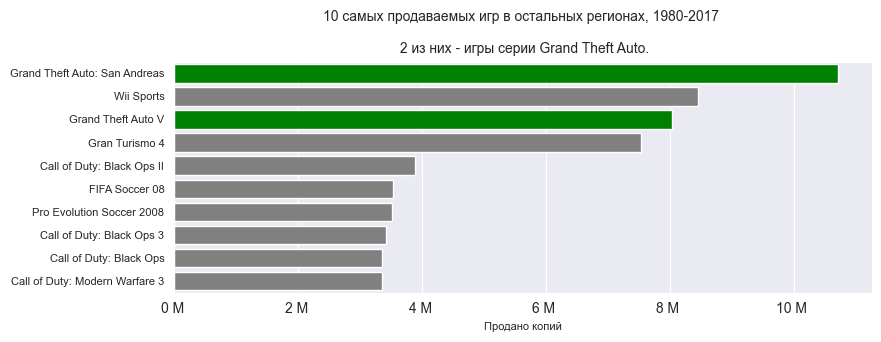

In [41]:
fig32, ax32 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_other_sales.head(10),
            y = 'Name',
            x = 'Other_Sales',
            orient = 'h')

one_three_green = ['green','grey','green']

for i, patch in enumerate(ax32.patches):
    if i < len(one_three_green):
        patch.set_facecolor(one_three_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,          # General font size
                     'axes.titlesize': 10,    # Title font size
                     'axes.labelsize': 8,     # X and Y label font size
                     'xtick.labelsize': 10,    # X-axis tick label font size
                     'ytick.labelsize': 8})   # Y-axis tick label font size

ax32.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в остальных регионах, 1980-2017 \n \n 2 из них - игры серии Grand Theft Auto.')

ax32.set(xlabel = 'Продано копий')
ax32.set(ylabel = None)

[Text(0, 0.5, '')]

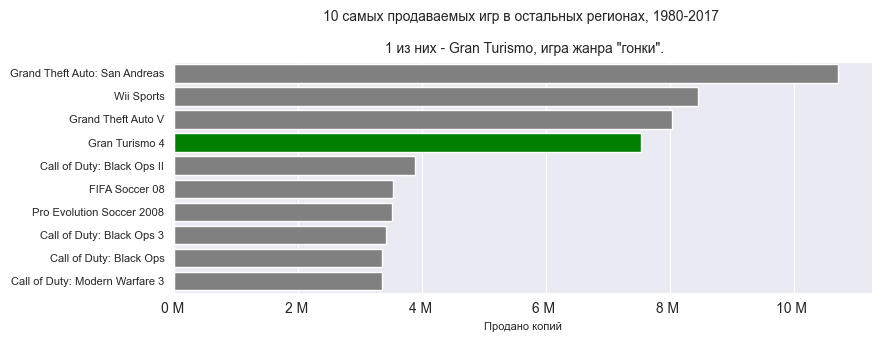

In [42]:
fig33, ax33 = plt.subplots(figsize=(9,3))
sns.barplot(data = df_vg_games_sort_other_sales.head(10),
            y = 'Name',
            x = 'Other_Sales',
            orient = 'h')

fourth_green = ['grey','grey','grey','green']

for i, patch in enumerate(ax33.patches):
    if i < len(fourth_green):
        patch.set_facecolor(fourth_green[i])
    else:
        patch.set_facecolor('gray')

plt.rcParams.update({'font.size': 10,
                     'axes.titlesize': 10,
                     'axes.labelsize': 8,
                     'xtick.labelsize': 10,
                     'ytick.labelsize': 8})

ax33.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('10 самых продаваемых игр в остальных регионах, 1980-2017 \n \n 1 из них - Gran Turismo, игра жанра "гонки".')

ax33.set(xlabel = 'Продано копий')
ax33.set(ylabel = None)